# Taux decroché telephonique

In [39]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [76]:
df = pd.read_excel("C:\\Users\\user\\Desktop\\CNAM\\Projet 2_IJ et front_indicateurs V3_2\\Projet 2_IJ et front_indicateurs V3_2.xlsx", sheet_name='Tx décroché téléphonique - Sem',skiprows=range(1, 21),header=1)

In [77]:
result_df = pd.concat([df], axis=0)

In [78]:
result_df.head()

,Code indicateur,Type de période,Période,Num organisme,Txt organisme,Libellé organisme,Axe 1,Axe 2,Axe 3,Axe 4,Axe 5,Mesure 1,Mesure 2,Mesure 3
0,Tx_Decroche_Hebdo,H,202001,131,CP131,131-Marseille,NaN,NaN,NaN,NaN,NaN,0.714867,8603,6150
1,Tx_Decroche_Hebdo,H,202002,131,CP131,131-Marseille,NaN,NaN,NaN,NaN,NaN,0.634726,18931,12016
2,Tx_Decroche_Hebdo,H,202003,131,CP131,131-Marseille,NaN,NaN,NaN,NaN,NaN,0.787955,15077,11880
3,Tx_Decroche_Hebdo,H,202004,131,CP131,131-Marseille,NaN,NaN,NaN,NaN,NaN,0.785640,12451,9782
4,Tx_Decroche_Hebdo,H,202005,131,CP131,131-Marseille,NaN,NaN,NaN,NaN,NaN,0.524065,18284,9582


In [79]:
result_df['Période'] = result_df['Période'].astype(str).str[:4]
resultat_groupby = result_df.groupby(['Num organisme', 'Période'])['Mesure 1'].mean().reset_index()

print(resultat_groupby)


     Num organisme Période  Mesure 1
0               61    2020  0.852195
1               61    2021  0.854435
2               61    2022  0.804581
3               61    2023  0.794362
4              111    2020  0.755447
..             ...     ...       ...
199            973    2023  0.863787
200            974    2020  0.696864
201            974    2021  0.769305
202            974    2022  0.460920
203            974    2023  0.726311

[204 rows x 3 columns]


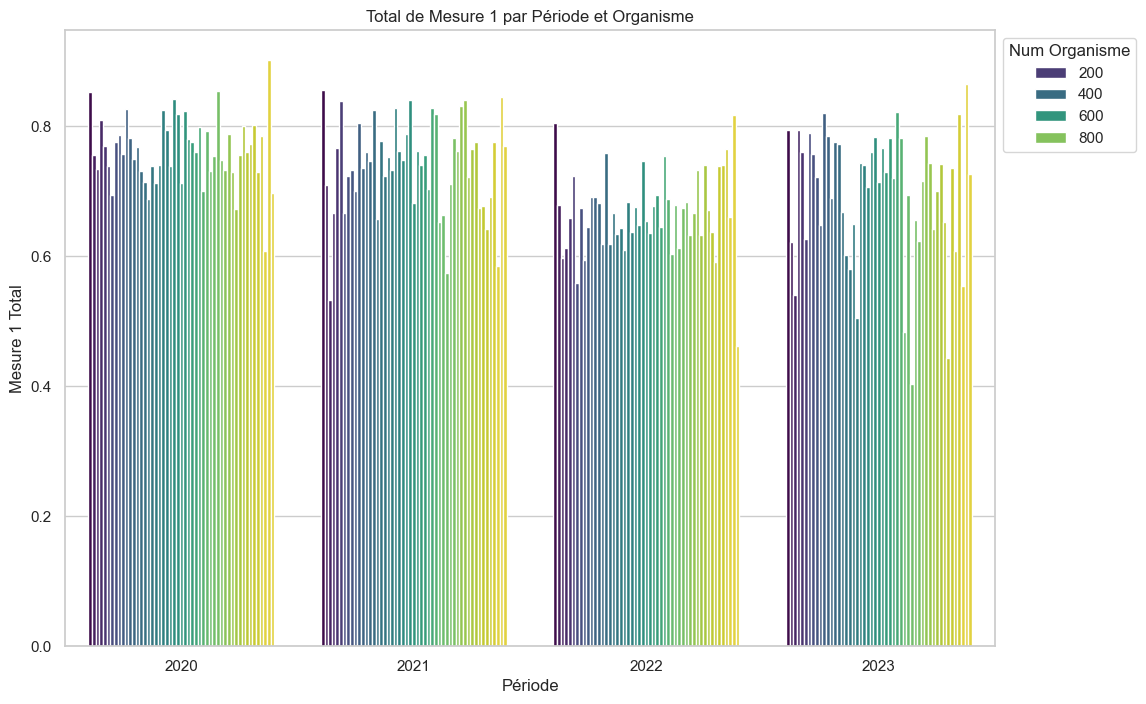

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Définir le style de Seaborn
sns.set(style="whitegrid")

# Créer un graphique en barres avec Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Période', y='Mesure 1', hue='Num organisme', data=resultat_groupby, palette='viridis')

# Ajouter des labels et une légende
plt.xlabel('Période')
plt.ylabel('Mesure 1 Total')
plt.title('Total de Mesure 1 par Période et Organisme')
plt.legend(title='Num Organisme', bbox_to_anchor=(1, 1), loc='upper left')

# Afficher le graphique
plt.show()

# Mensuel

In [81]:
df = pd.read_excel("C:\\Users\\user\\Desktop\\CNAM\\Projet 2_IJ et front_indicateurs V3_2\\Projet 2_IJ et front_indicateurs V3_2.xlsx", sheet_name='Tx décroché téléphonique - Mois',skiprows=range(1, 21),header=1)

In [82]:
result_df = df

In [87]:
result_df['Période'] = result_df['Période'].astype(str).str[4:]
resultat_groupby = result_df.groupby(['Num organisme', 'Période'])['Mesure 1'].mean().reset_index()

print(resultat_groupby)


    Num organisme Période  Mesure 1
0              61          0.865034
1             111          0.761927
2             131          0.698852
3             141          0.779271
4             151          0.900374
..            ...     ...       ...
56            951          0.825491
57            971          0.550102
58            972          0.703250
59            973          0.860730
60            974          0.719019

[61 rows x 3 columns]


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

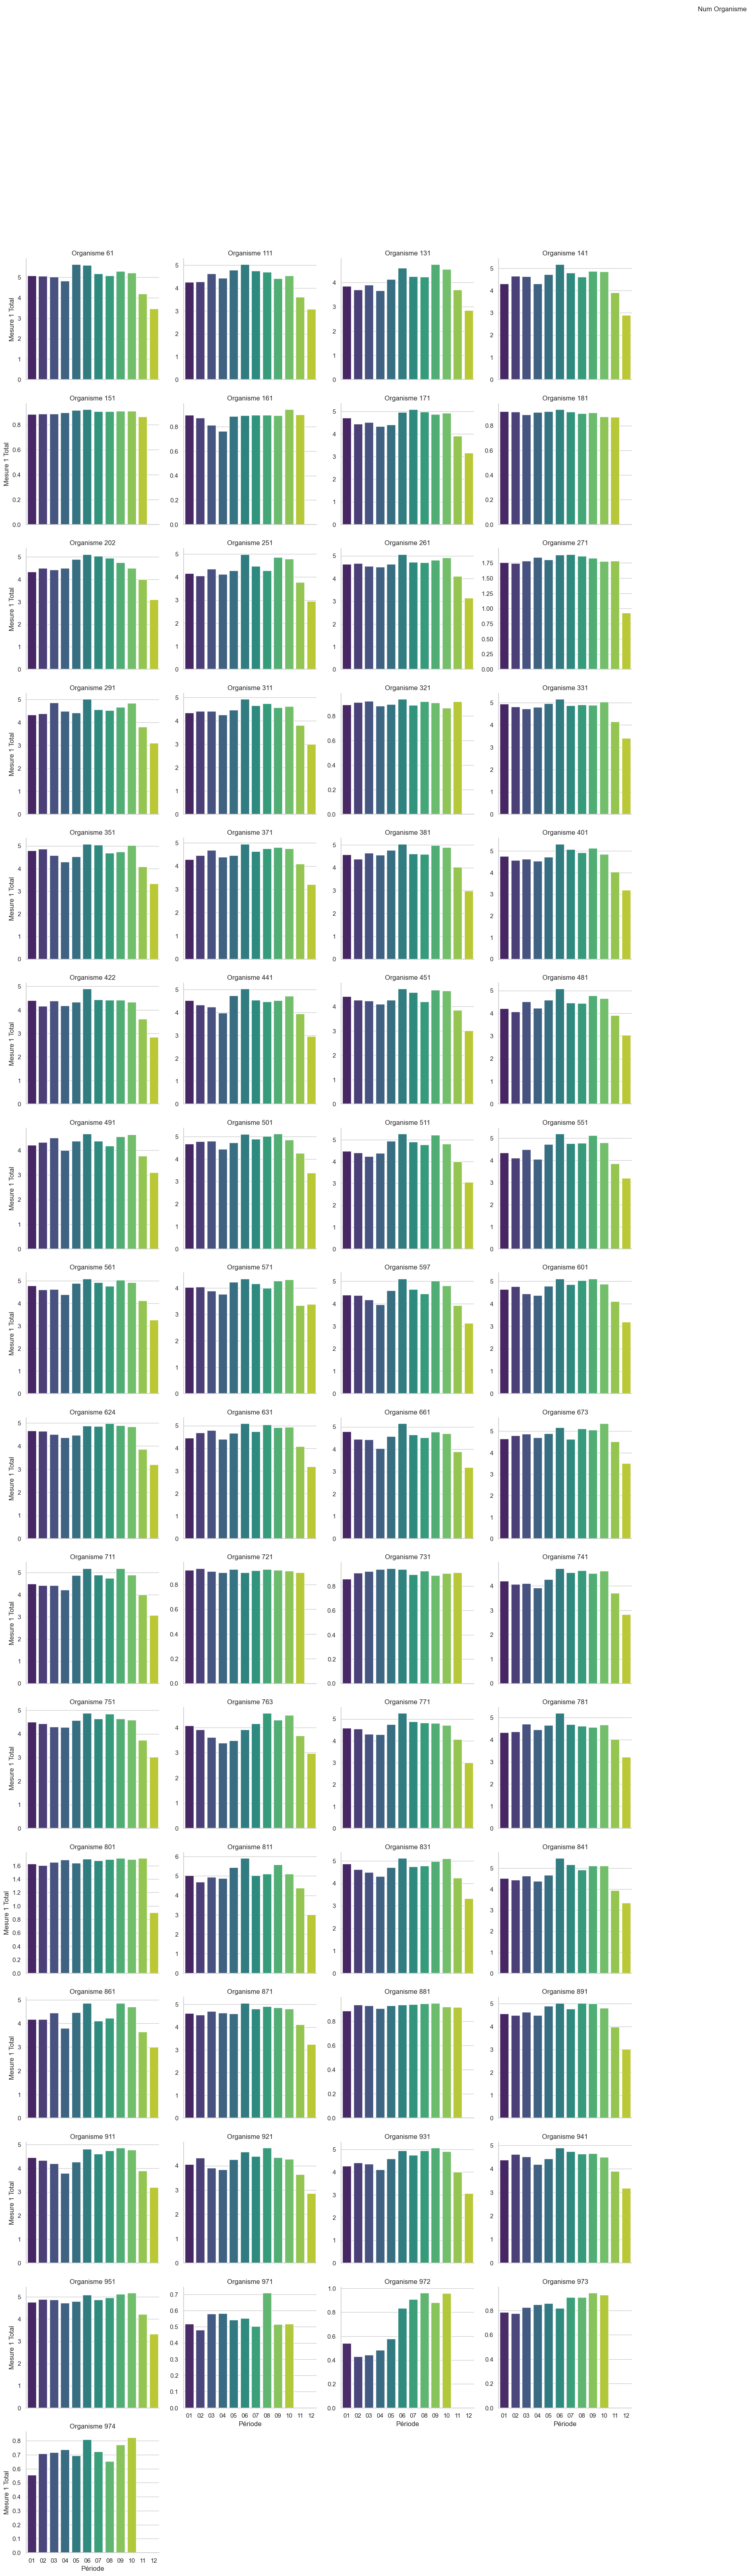

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assurez-vous que 'Mesure 1' est converti en numérique si ce n'est pas déjà le cas
resultat_groupby['Mesure 1'] = pd.to_numeric(resultat_groupby['Mesure 1'])

# Définir le style de Seaborn
sns.set(style="whitegrid")

# Créer une grille de graphiques avec un graphique par organisme
g = sns.FacetGrid(resultat_groupby, col="Num organisme", col_wrap=4, height=4, sharey=False)
g.map(sns.barplot, 'Période', 'Mesure 1', palette='viridis')

# Ajouter des labels et une légende
g.set_axis_labels('Période', 'Mesure 1 Total')
g.set_titles("Organisme {col_name}")
g.add_legend(title='Num Organisme', bbox_to_anchor=(1, 1), loc='upper left')

# Ajuster l'espacement entre les graphiques
plt.subplots_adjust(top=0.9)

# Afficher la grille de graphiques
plt.show()
